In [1]:
# Importing necessary basic libraries and modules
from PytorchWildlife.models import detection as pw_detection
from PytorchWildlife.data import transforms as pw_trans
import intel_npu_acceleration_library as npu_lib
from PytorchWildlife import utils as pw_utils
from PIL import Image
import numpy as np
import requests
import torch
import os


In [2]:

# Setting the device to use for computations ('cuda' indicates GPU, "npu" indicates intel NPU)
DEVICE = "npu" if npu_lib.backend.npu_available() else "cuda" if torch.cuda.is_available() else "cpu"

# Initializing the MegaDetectorV5 model for image detection
print(f"Initializing MegaDetectorV5 model for image detection to device {DEVICE}...")
detection_model = pw_detection.MegaDetectorV5(device=DEVICE, pretrained=True)


In [3]:

# Specifying the path to the target image
#url = "https://raw.githubusercontent.com/microsoft/CameraTraps/main/demo/demo_data/imgs/10050028_0.JPG"
url = "https://www.parks.it/tmpFoto/30079_4_PNALM.jpeg"

# Opening and converting the image to RGB format
img = Image.open(requests.get(url, stream=True).raw).convert("RGB")

# Save to disk
os.makedirs("demo_output", exist_ok=True)
img_path = os.path.join("demo_output", "camera_image_xyz_timestamp_xxx.jpg")
img.save(img_path)

img = np.array(img)
img.shape, img.dtype


((1203, 1603, 3), dtype('uint8'))

In [4]:

# Initializing the Yolo-specific transform for the image
transform = pw_trans.MegaDetector_v5_Transform(target_size=detection_model.IMAGE_SIZE,
                                               stride=detection_model.STRIDE)



In [5]:

# Performing the detection on the single image
results = detection_model.single_image_detection(transform(img), img.shape, img_path)

for key in results:
    print(key, results[key])

img_id demo_output\camera_image_xyz_timestamp_xxx.jpg
detections Detections(xyxy=array([[        387,         350,         852,         621],
       [       1071,         648,        1524,         864]], dtype=float32), mask=None, confidence=array([    0.93207,     0.93001], dtype=float32), class_id=array([0, 0]), tracker_id=None)
labels ['animal 0.93', 'animal 0.93']


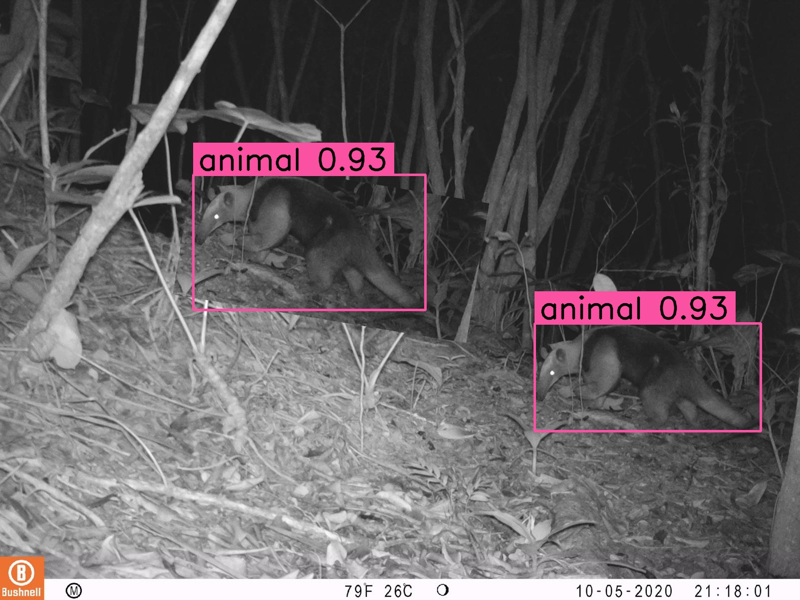

In [6]:
# Saving the detection results 
pw_utils.save_detection_images(results, os.path.join(".","demo_output"), overwrite=False)


Image.open(os.path.join("demo_output", "camera_image_xyz_timestamp_xxx.jpg")).resize((800, 600))